# VisDat MidTerm

## Otniel Abiezer - 1301180469

Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

mpl.style.use(['ggplot'])
pd.options.mode.chained_assignment = None

Import Dataset

In [ ]:
url1 = 'https://drive.google.com/uc?id=13xLSKrh-lcKZpcxHuvdnl7nblSFILtkM'
url2 = 'https://drive.google.com/uc?id=1bxBicsXejby574w6rThAyrtOrIyYWDV1'
df_covid = pd.read_csv(url1)
df_province = pd.read_csv(url2)

## Data Exploration

### Covid

Isi DF Covid

In [ ]:
df_covid.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
0,02-Mar-20,339,339,2,2,335,2,2
1,03-Mar-20,2,341,0,2,337,2,2
2,04-Mar-20,31,372,0,2,356,14,2
3,05-Mar-20,16,388,0,2,371,15,2
4,06-Mar-20,62,450,2,4,422,24,4


Ukuran Dataframe

In [ ]:
df_covid.shape

(30, 8)

Info tipe data Dataframe

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           30 non-null     object
 1   new_tested     30 non-null     int64 
 2   acc_tested     30 non-null     int64 
 3   new_confirmed  30 non-null     int64 
 4   acc_confirmed  30 non-null     int64 
 5   acc_negative   30 non-null     int64 
 6   being_checked  30 non-null     int64 
 7   isolated       30 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.0+ KB


Statistik Dataframe

In [ ]:
df_covid.describe()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,229.233333,2275.300000,50.933333,398.933333,1875.000000,13.000000,346.266667
std,281.828229,2153.042645,48.962993,480.433923,1680.618954,11.110728,414.461673
min,2.000000,339.000000,0.000000,2.000000,335.000000,0.000000,2.000000
25%,63.750000,580.750000,3.250000,21.000000,527.250000,0.000000,21.000000
50%,136.000000,1351.000000,36.500000,153.000000,1230.500000,15.000000,138.500000
75%,315.000000,3188.000000,97.750000,658.500000,2513.000000,20.000000,575.000000
max,1439.000000,6777.000000,153.000000,1528.000000,5249.000000,37.000000,1311.000000


### Province

Isi DF Province

In [ ]:
df_province.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


Ukuran Dataframe

In [ ]:
df_province.shape

(34, 12)

Info tipe data Dataframe

In [ ]:
df_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          34 non-null     int64 
 1   province_name        34 non-null     object
 2   island               34 non-null     object
 3   iso_code             34 non-null     object
 4   capital_city         34 non-null     object
 5   population           34 non-null     int64 
 6   population_kmsquare  34 non-null     int64 
 7   confirmed            34 non-null     int64 
 8   deceased             34 non-null     int64 
 9   released             34 non-null     int64 
 10  longitude            34 non-null     object
 11  latitude             34 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.3+ KB


Statistik Dataframe

In [ ]:
df_province.describe()

,province_id,population,population_kmsquare,confirmed,deceased,released
count,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000
mean,17.500000,7.412293e+06,297.558824,29.911765,2.529412,1.352941
std,9.958246,1.068707e+07,427.403733,103.257069,8.975506,5.476575
min,1.000000,6.183840e+05,2.000000,0.000000,0.000000,0.000000
25%,9.250000,2.034712e+06,47.250000,1.000000,0.000000,0.000000
50%,17.500000,3.737945e+06,93.000000,3.500000,0.000000,0.000000
75%,25.750000,7.503236e+06,234.500000,8.750000,1.000000,0.000000
max,34.000000,4.602967e+07,1353.000000,598.000000,51.000000,31.000000


## Data Preprocessing

Mengubah tipe data kolom date dari object menjadi datetime

In [ ]:
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           30 non-null     datetime64[ns]
 1   new_tested     30 non-null     int64         
 2   acc_tested     30 non-null     int64         
 3   new_confirmed  30 non-null     int64         
 4   acc_confirmed  30 non-null     int64         
 5   acc_negative   30 non-null     int64         
 6   being_checked  30 non-null     int64         
 7   isolated       30 non-null     int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 2.0 KB


DF Covid tes apakah tested sama dengan positive + negative + lagi dicek

In [ ]:
df_covid['acc_tested'] == df_covid['acc_confirmed'] + df_covid['acc_negative'] + df_covid['being_checked']

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15    False
16     True
17    False
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
dtype: bool

## Soal 1

Ambil kolom date, acc_tested, acc_confirmed, acc_negative

In [ ]:
df_covid_test = df_covid[['date', 'acc_tested', 'acc_confirmed', 'acc_negative']]
df_covid_test.rename(columns={'date' : 'Tanggal', 'acc_tested' : 'Jumlah Tes', 'acc_confirmed' : 'Konfirmasi Positif', 'acc_negative' : "Konfirmasi Negatif"}, inplace=True)
df_covid_test.tail()

,Tanggal,Jumlah Tes,Konfirmasi Positif,Konfirmasi Negatif
25,2020-03-27,5775,1046,4729
26,2020-03-28,6266,1155,5111
27,2020-03-29,6534,1285,5249
28,2020-03-30,6663,1414,5249
29,2020-03-31,6777,1528,5249


Visualisasi Line Plot


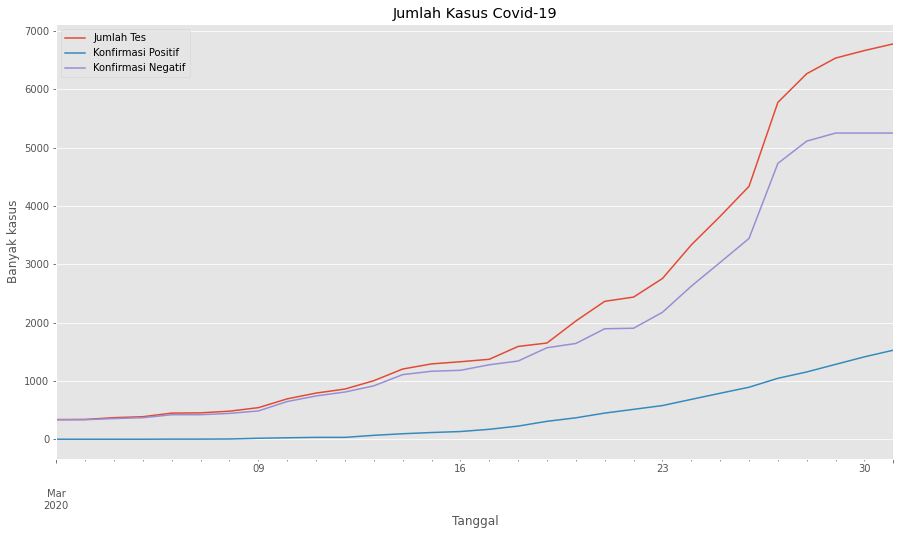

In [ ]:
df_covid_test.plot(x='Tanggal',
                   figsize = (15,8))
plt.title('Jumlah Kasus Covid-19', color='black')
plt.ylabel('Banyak kasus')

l = plt.legend()
for text in l.get_texts():
    text.set_color("black")

plt.show()

## Soal 2

### 2.1. Positive Rate dan Negative Rate

Menghitung Positive Rate

In [ ]:
positive_rate = df_covid['acc_confirmed'] / df_covid['acc_tested'] * 100
positive_rate

0      0.589971
1      0.586510
2      0.537634
3      0.515464
4      0.888889
5      0.881057
6      1.242236
7      3.499079
8      3.890490
9      4.287516
10     3.944316
11     6.865672
12     7.966805
13     9.048724
14    10.075188
15    12.536443
16    14.258794
17    18.715930
18    18.195266
19    19.027484
20    21.082855
21    21.008708
22    20.558223
23    20.669806
24    20.595018
25    18.112554
26    18.432812
27    19.666361
28    21.221672
29    22.546850
dtype: float64

Menghitung Negative Rate

In [ ]:
negative_rate = df_covid['acc_negative'] / df_covid['acc_tested'] * 100
negative_rate

0     98.820059
1     98.826979
2     95.698925
3     95.618557
4     93.777778
5     92.951542
6     92.132505
7     89.686924
8     93.371758
9     93.820933
10    94.083527
11    91.243781
12    92.033195
13    90.255220
14    88.947368
15    93.148688
16    84.296482
17    95.093882
18    81.015779
19    80.126850
20    78.096801
21    78.991292
22    78.781513
23    79.330194
24    79.404982
25    81.887446
26    81.567188
27    80.333639
28    78.778328
29    77.453150
dtype: float64

Memasukkan ke tabel

In [ ]:
df_covid['Positive Rate'] = positive_rate
df_covid['Negative Rate'] = negative_rate
df_covid.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,Positive Rate,Negative Rate
0,2020-03-02,339,339,2,2,335,2,2,0.589971,98.820059
1,2020-03-03,2,341,0,2,337,2,2,0.586510,98.826979
2,2020-03-04,31,372,0,2,356,14,2,0.537634,95.698925
3,2020-03-05,16,388,0,2,371,15,2,0.515464,95.618557
4,2020-03-06,62,450,2,4,422,24,4,0.888889,93.777778


### 2.2. Visualisasi Bar Plot

In [ ]:
positive_negative = df_covid[['date', 'Positive Rate', 'Negative Rate']]
positive_negative.set_index('date',inplace=True)
positive_negative.head()

,Positive Rate,Negative Rate
date,,
2020-03-02,0.589971,98.820059
2020-03-03,0.586510,98.826979
2020-03-04,0.537634,95.698925
2020-03-05,0.515464,95.618557
2020-03-06,0.888889,93.777778


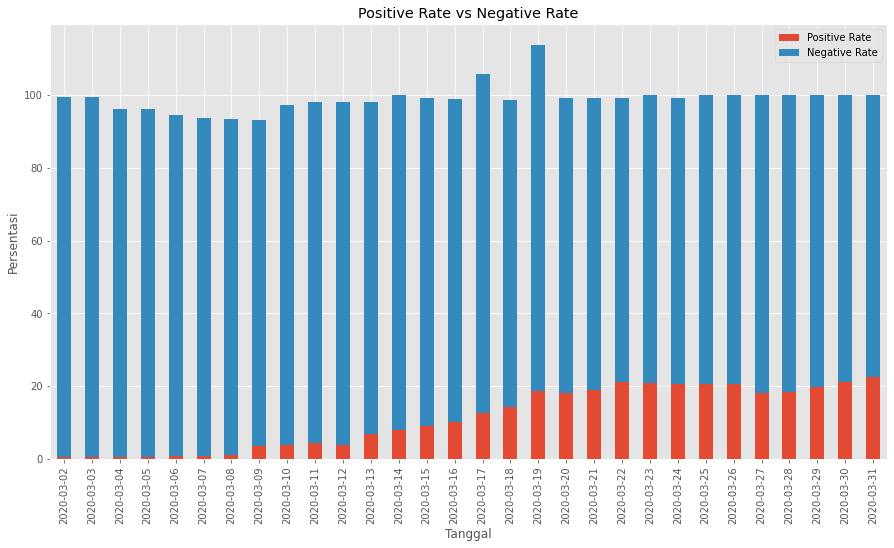

In [ ]:
ax = positive_negative.plot(kind='bar', 
                       figsize=(15,8),
                       stacked=True)

ax.set_xticklabels(positive_negative.index.format())
plt.title("Positive Rate vs Negative Rate", color='black')
plt.xlabel('Tanggal')
plt.ylabel('Persentasi')

l = plt.legend()
for text in l.get_texts():
    text.set_color("black")

plt.show()

### 2.3. Positive Rate Tertinggi

In [ ]:
positive_negative[positive_negative['Positive Rate'] == positive_negative['Positive Rate'].max()]

,Positive Rate,Negative Rate
date,,
2020-03-31,22.54685,77.45315


Positive Rate tertinggi pada tanggal 31 Maret 2020

### 2.4. Negative Rate Tertinggi

In [ ]:
positive_negative[positive_negative['Negative Rate'] == positive_negative['Negative Rate'].max()]

,Positive Rate,Negative Rate
date,,
2020-03-03,0.58651,98.826979


Negative Rate Tertinggi pada tanggal 3 Maret 2020

## Soal 3

### 3.1. Menunjukan Korelasi

Mencari korelasi

In [ ]:
df_covid.corr()

,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,Positive Rate,Negative Rate
new_tested,1.000000,0.529012,0.681682,0.488240,0.541540,-0.402717,0.494872,0.482762,-0.425873
acc_tested,0.529012,1.000000,0.927075,0.992487,0.999088,-0.611367,0.992602,0.799769,-0.795623
new_confirmed,0.681682,0.927075,1.000000,0.925703,0.929067,-0.504804,0.928491,0.904245,-0.834043
acc_confirmed,0.488240,0.992487,0.925703,1.000000,0.987653,-0.599737,0.999920,0.820484,-0.816270
acc_negative,0.541540,0.999088,0.929067,0.987653,1.000000,-0.613971,0.987858,0.797495,-0.781272
being_checked,-0.402717,-0.611367,-0.504804,-0.599737,-0.613971,1.000000,-0.600341,-0.412079,0.318069
isolated,0.494872,0.992602,0.928491,0.999920,0.987858,-0.600341,1.000000,0.822680,-0.817870
Positive Rate,0.482762,0.799769,0.904245,0.820484,0.797495,-0.412079,0.822680,1.000000,-0.896357
Negative Rate,-0.425873,-0.795623,-0.834043,-0.816270,-0.781272,0.318069,-0.817870,-0.896357,1.000000


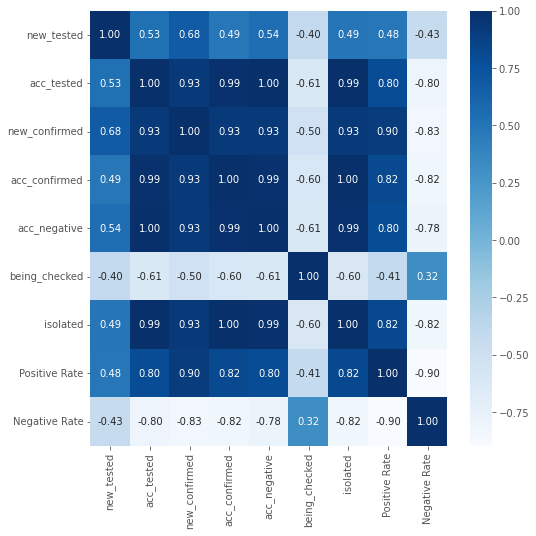

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_covid.corr(), cmap='Blues', annot=True, fmt='.2f')

### 3.2. Korelasi paling positif

Korelasi paling besar adalah antara isolated dengan acc_confirmed, dengan nilai +0.999920. 
Semakin tinggi acc_confirmed maka semakin tinggi juga isolated dan begitu juga sebaliknya

### 3.3. Korelasi paling negatif

Korelasi paling negatif adalah Positive Rate dengan Negative Rate, dengan nilai -0.896357 , yaitu jika Positive Rate nya semakin tinggi, makan Negative Rate nya akan semakin rendah.

Tetapi, untuk dataset kolom yang lama (sebelum ada Positive Rate dan Negative Rate), korelasi paling negatifnya adalah being_checked dan acc_negative dengan nilai -0.613971. Semakin tinggi being_checked nya maka akan semakin rendah acc_negative nya.

## Soal 4

### 4.1. Positif / Populasi km^2

In [ ]:
persen_positif = df_province['confirmed'] / df_province['population_kmsquare'] * 100
df_province['persen_positif'] = persen_positif
df_province.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,persen_positif
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994,4.651163
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731,1.219512
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299,6.471495
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725,0.000000
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382,1.940035


### 4.2. Visualisasi Bar Plot

Mengambil kolom Nama Provinsi dan Persen Positif

In [ ]:
vis_persen = df_province[['province_name', 'persen_positif']]
vis_persen.head()

,province_name,persen_positif
0,Aceh,4.651163
1,Bali,1.219512
2,Banten,6.471495
3,Bengkulu,0.000000
4,DI Yogyakarta,1.940035


Visualisasi dengan Bar Plot

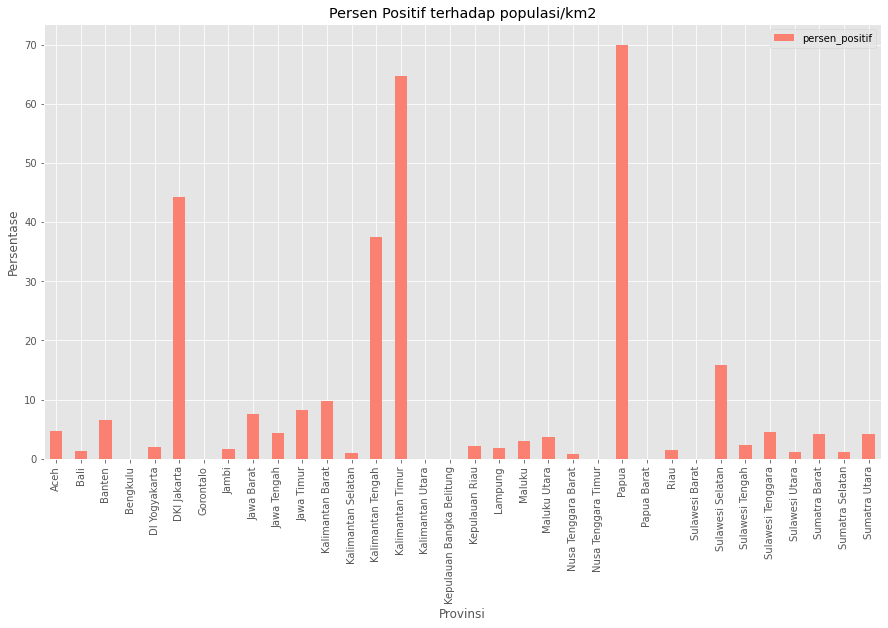

In [ ]:
vis_persen.plot(kind='bar', 
                x='province_name',
                figsize=(15,8),
                color='salmon')
plt.title('Persen Positif terhadap populasi/km2')
plt.xlabel('Provinsi')
plt.ylabel('Persentase')
plt.show()

### 4.3. Tiga Provinsi dengan Nilai Persentase Terbesar

In [ ]:
vis_persen.sort_values(by='persen_positif', ascending = False).head(3)

,province_name,persen_positif
23,Papua,70.000000
14,Kalimantan Timur,64.705882
5,DKI Jakarta,44.198078


## Soal 5

Melakukan Group By per Pulau

In [ ]:
konfirmasi = df_province.groupby('island')['confirmed'].sum()
df_konfirmasi = konfirmasi.to_frame()
df_konfirmasi

,confirmed
island,
Jawa,911
Kalimantan,22
Kepulauan Maluku,2
Kepulauan Nusa Tenggara,11
Papua,7
Sulawesi,35
Sumatra,29


Visualisasi ke dalam Pie Chart

No handles with labels found to put in legend.


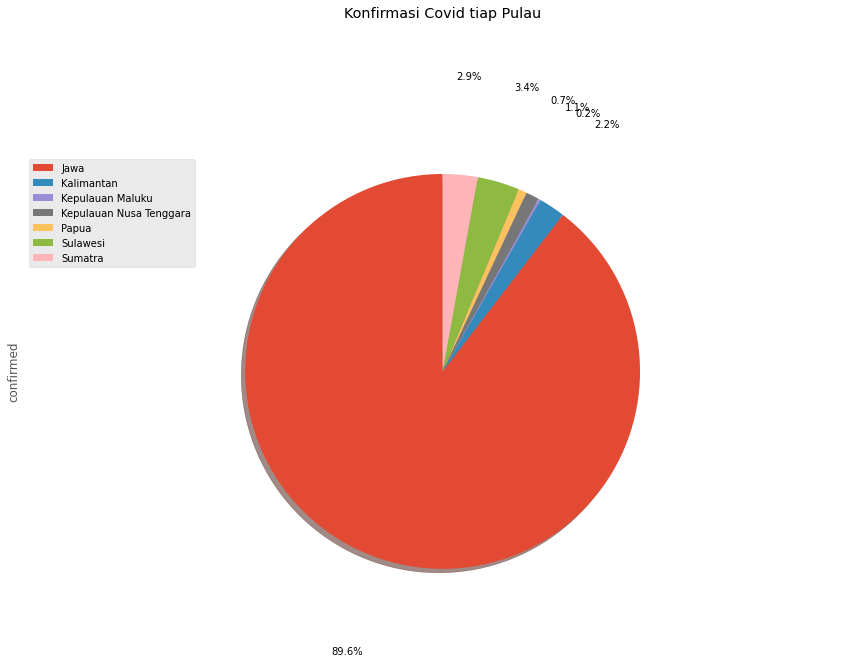

In [ ]:
df_konfirmasi.plot(kind='pie',
                    figsize=(15,8),
                    autopct='%1.1f%%', 
                    startangle=90,    
                    shadow=True,       
                    labels=None,
                    pctdistance=1.5,
                    subplots = True
                    )
plt.legend(labels = df_konfirmasi.index, loc='upper left')
plt.title("Konfirmasi Covid tiap Pulau", y=1.3)
plt.axis('equal') 
plt.show()